### Time series forecasting is a valuable technique used to predict future values based on historical data points that are indexed in chronological order. One popular approach for time series forecasting is the Autoregressive Integrated Moving Average (ARIMA) model.

In [76]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta

## Code to Retrieve and Prepare Historical Stock Data for Amazon (AMZN)

In [77]:
today = date.today()

d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

df = yf.download('AMZN', 
                 start=start_date, 
                 end=end_date, 
                 progress=False)
df["Date"] = df.index
df = df[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
df.reset_index(drop=True, inplace=True)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-05-23,108.460999,108.819000,103.949997,107.556999,107.556999,107798000
1,2022-05-24,104.025002,105.400002,101.260002,104.099998,104.099998,102934000
2,2022-05-25,103.655502,108.175003,103.650002,106.775002,106.775002,93120000
3,2022-05-26,107.970001,112.665497,107.453499,111.077499,111.077499,93002000
4,2022-05-27,113.550003,115.186996,112.627998,115.146500,115.146500,93660000


## Set Display Options, Visualize Data, and Obtain Dataset Overview



In [78]:
pd.set_option('display.max_columns', None)

import plotly.express as px #for visualization


#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:n')
    print('Number of rows: ', df.shape[0])
    print("nNumber of features:", df.shape[1])
    print("nData Features:")
    print(df.columns.tolist())
    print("nMissing values:", df.isnull().sum().values.sum())
    print("nUnique values:")
    print(df.nunique())

dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:n
Number of rows:  250
nNumber of features: 7
nData Features:
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
nMissing values: 0
nUnique values:
Date         250
Open         239
High         244
Low          245
Close        248
Adj Close    248
Volume       250
dtype: int64


##  Extract and Display Date and Close Price Data

In [79]:
data = df[["Date", "Close"]]
print(data.head())

        Date       Close
0 2022-05-23  107.556999
1 2022-05-24  104.099998
2 2022-05-25  106.775002
3 2022-05-26  111.077499
4 2022-05-27  115.146500


## Plot Date vs Close Price

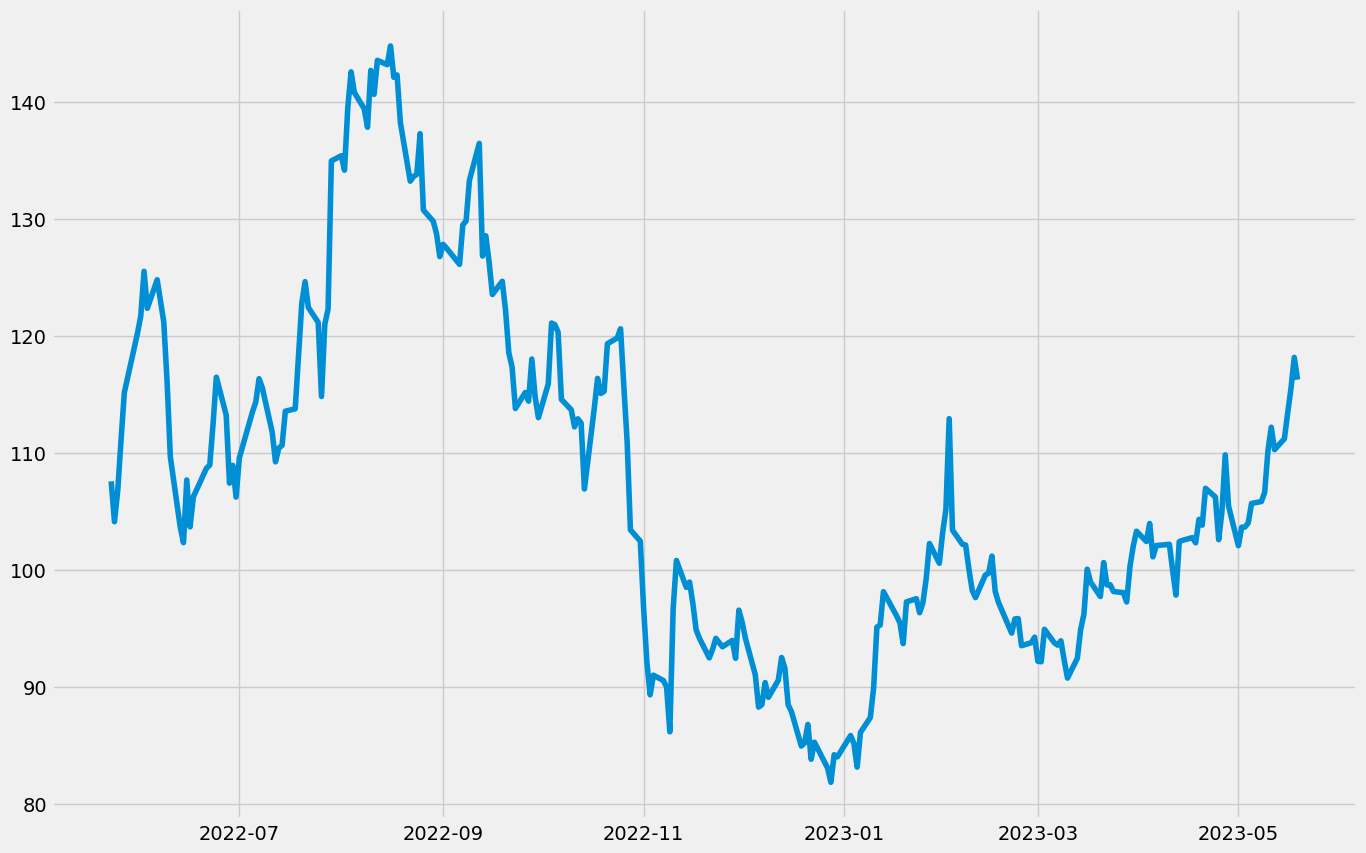

In [80]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

## Seasonal Decomposition of Close Price Data

To use the ARIMA model, it’s important to first determine whether your data is stationary or seasonal. One way to do this is by using the seasonal decomposition method, which splits the time series data into trend, seasonal, and residual components.

Based on the visualization graph of the closing stock prices provided, I determined that my dataset is not stationary. To properly check whether my dataset is stationary or seasonal using the seasonal decomposition method, I split the time series data into trend, seasonal, and residual components for a better understanding of the time series data.

<Figure size 640x480 with 0 Axes>

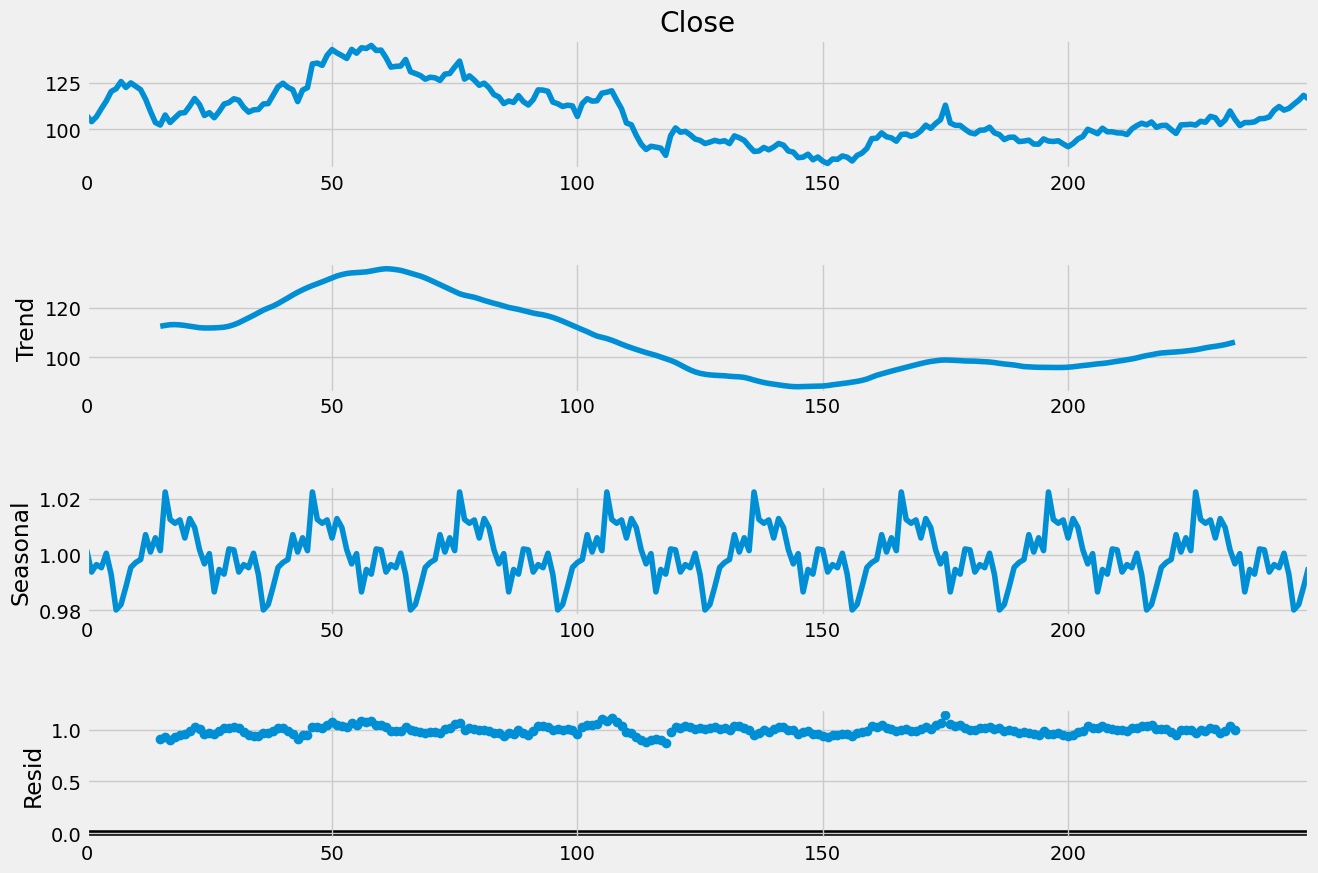

In [81]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], 
                            model='multiplicative', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

## Plot Autocorrelation of Close Price

Based on the analysis of the closing stock prices data I provided, I found that the data is seasonal and not stationary. To forecast time series data, we need to use the Seasonal ARIMA (SARIMA) model. However, before using the SARIMA model, it’s recommended that we first use the ARIMA model to learn how to use both models.

To use ARIMA or SARIMA, we need to find the p, d, and q values. We can find the value of p by plotting the autocorrelation of the Close column and the value of q by plotting the partial autocorrelation plot. The value of d is either 0 or 1. If the data is stationary, we should use 0, and if the data is seasonal, we should use 1. Since our data is seasonal, we should use 1 as the d value.

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

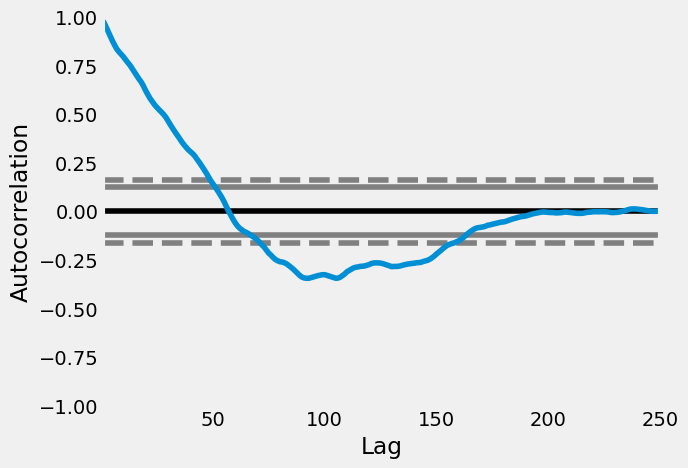

In [82]:
pd.plotting.autocorrelation_plot(data["Close"])

##  Plot Partial Autocorrelation Function (PACF) of Close Price

c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


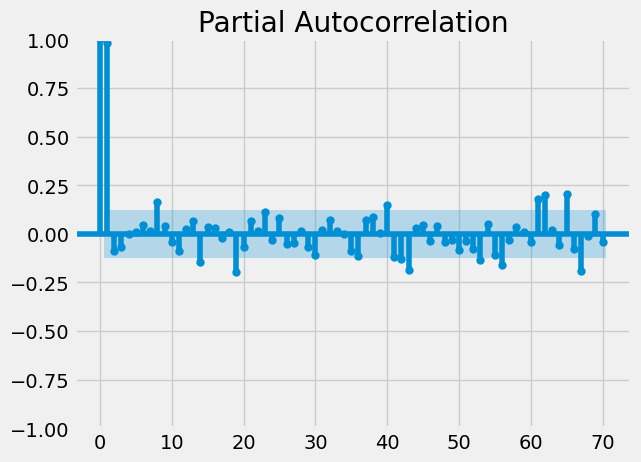

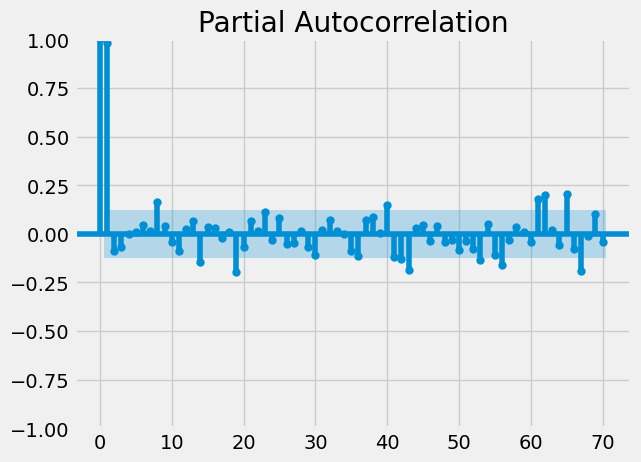

In [83]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 70)

## Fit ARIMA Model and Print Summary

In [84]:
p, d, q = 4, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model1 = ARIMA(data["Close"], order=(p,d,q)) 
fitted_ARIMA = model1.fit() 
print(fitted_ARIMA.summary())

c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(4, 1, 2)   Log Likelihood                -626.117
Date:                Sun, 21 May 2023   AIC                           1266.234
Time:                        08:30:07   BIC                           1290.856
Sample:                             0   HQIC                          1276.145
                                - 250                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7314      0.171     10.128      0.000       1.396       2.066
ar.L2         -0.8831      0.218     -4.056      0.000      -1.310      -0.456
ar.L3         -0.0425      0.149     -0.286      0.7

c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## Generate ARIMA Model Predictions

In [85]:
predictions_b= fitted_ARIMA.predict(len(data), len(data)+10)
predictions_a = fitted_ARIMA.predict()
print(predictions_a)
print(predictions_b)

0        0.000000
1      107.557061
2      103.882874
3      106.736135
4      111.480682
          ...    
245    110.194410
246    110.902031
247    113.132447
248    115.269406
249    117.971076
Name: predicted_mean, Length: 250, dtype: float64
250    115.955207
251    115.561469
252    115.261985
253    115.074143
254    115.025528
255    115.113841
256    115.313000
257    115.578980
258    115.859111
259    116.102158
260    116.267382
Name: predicted_mean, dtype: float64


## Plot Training Data and ARIMA Model Predictions


<Axes: >

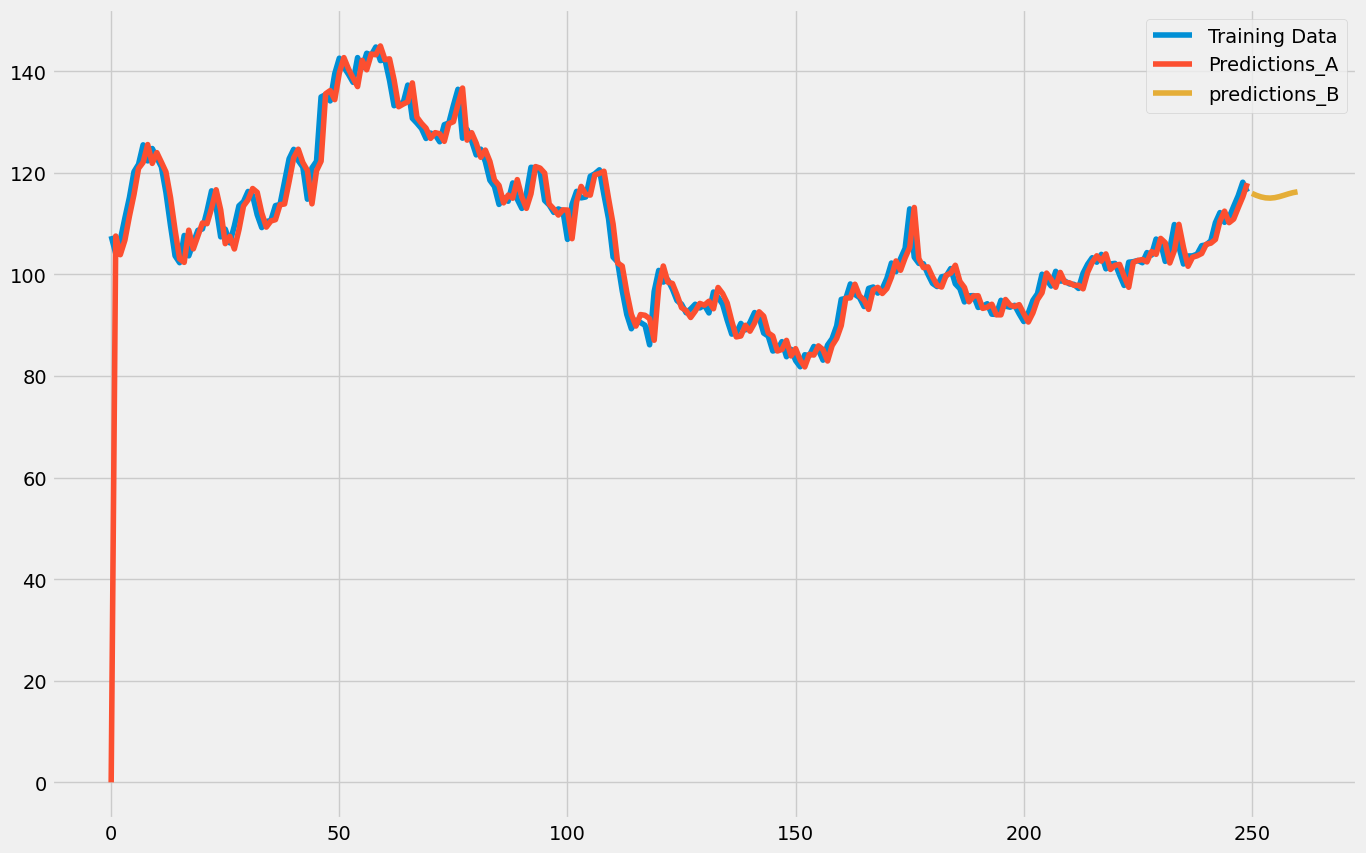

In [86]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions_a.plot(legend=True, label="Predictions_A")
predictions_b.plot(legend= True, label = "predictions_B")

## Fit SARIMA Model and Print Summary

In [97]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\ankit\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(4, 1, 2)x(4, 1, 2, 12)   Log Likelihood                -615.597
Date:                            Sun, 21 May 2023   AIC                           1257.194
Time:                                    08:34:17   BIC                           1302.279
Sample:                                         0   HQIC                          1275.366
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3772      0.368      3.739      0.000       0.655       2.099
ar.L2         -0.6493      0.346   

## Fit SARIMA Model and Print Summary

In [102]:
predictions_b = model.predict(len(data), len(data)+10)

## Plot Training Data and SARIMA Model Predictions

<Axes: >

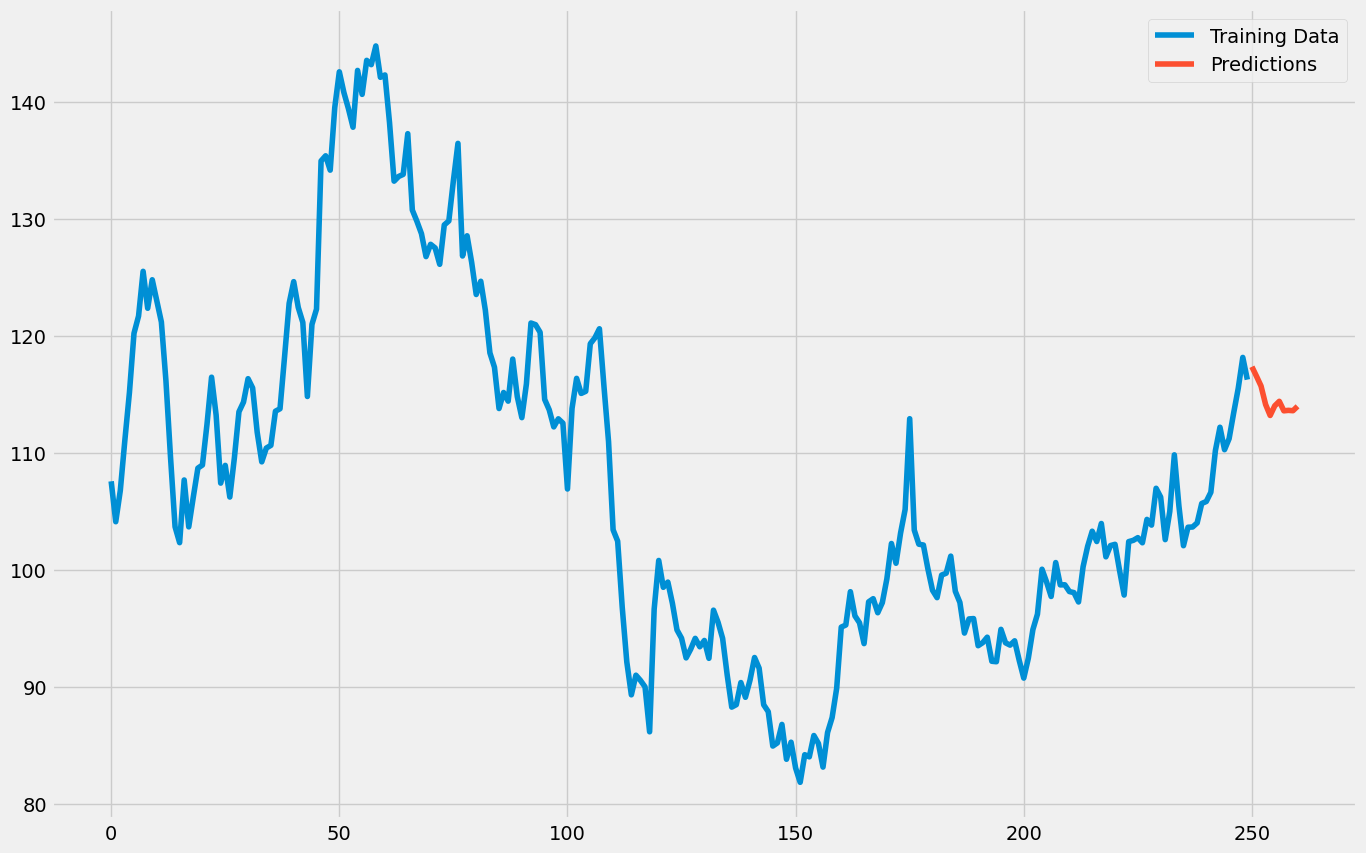

In [103]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions_b.plot(legend=True, label="Predictions")